### Problem 1:- Sphere Function 
### Formulation

$ f(X) = \sum_{i=1}^{n} x_{i}^2$

In [ ]:
# installing the scipy library 
!pip install scipy  

In [1]:
from scipy import optimize as so
import numpy as np
import math

In [65]:
# declaring the rosenbrock

def sphere_function(x):
    return sum(x**2.0)

In [95]:
# minimzing the above functions with the help of different optimizers

x=[-5,0,8,6,7,5] # intial guess for the optimizer

res = so.minimize(sphere_function,x,method='SLSQP')
print(res)

     fun: 0.0
     jac: array([1.49011612e-08, 1.49011612e-08, 1.49011612e-08, 1.49011612e-08,
       1.49011612e-08, 1.49011612e-08])
 message: 'Optimization terminated successfully.'
    nfev: 17
     nit: 2
    njev: 2
  status: 0
 success: True
       x: array([0., 0., 0., 0., 0., 0.])


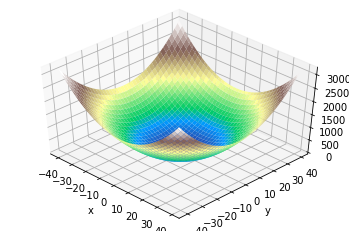

In [70]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
x = np.arange(-40, 40)
y = np.arange(-40, 40)
xgrid, ygrid = np.meshgrid(x, y) #it is to create a rectangular grid out of the values for x and Y
xy = np.stack([xgrid, ygrid]) #will create a new array by joining the sequence of different arrays of same dimension
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(45, -45)
ax.plot_surface(xgrid, ygrid, sphere_function(xy),cmap='terrain')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

### Problem 2
[nonlinear](https://apmonitor.com/pdc/index.php/Main/NonlinearProgramming)

In [80]:
import numpy as np
from scipy.optimize import minimize

In [89]:
def objective(x):
    return x[0]*x[3]*(x[0]+x[1]+x[2])+x[2]

def constraint1(x):
    return x[0]*x[1]*x[2]*x[3]-25.0

def constraint2(x):
    sum_eq = 40.0
    for i in range(4):
        sum_eq = sum_eq - x[i]**2
    return sum_eq

In [90]:
# initial guesses
n = 4
x0 = np.zeros(n)
x0[0] = 1.0
x0[1] = 5.0
x0[2] = 5.0
x0[3] = 1.0

# show initial objective
print('Initial SSE Objective: ' + str(objective(x0)))

Initial SSE Objective: 16.0


In [94]:
# optimize
b = (1.0,5.0)
bnds = (b, b, b, b)
con1 = {'type': 'ineq', 'fun': constraint1} 
con2 = {'type': 'eq', 'fun': constraint2}
cons = ([con1,con2])
solution = so.minimize(objective,x0,method='SLSQP',
                    bounds=bnds,constraints=cons)
x = solution.x

# show final objective
print('Final SSE Objective: ' + str(objective(x)))

Final SSE Objective: 17.01401724563517


In [92]:
# print solution
print('Solution')
print('x1 = ' + str(x[0]))
print('x2 = ' + str(x[1]))
print('x3 = ' + str(x[2]))
print('x4 = ' + str(x[3]))

Solution
x1 = -40
x2 = -39
x3 = -38
x4 = -37


### Problem 3:- Mishra's Bird function - constrained

[Link to the problem](https://en.wikipedia.org/wiki/Test_functions_for_optimization)


In [121]:
def mishra(x):
    return (math.sin(x[1])*math.exp((1-math.cos(x[0]))**2))+(math.cos(x[0])*math.exp((1-math.sin(x[1]))**2))+(x[0]-x[1])**2

In [127]:
# minimzing the above functions with the help of different optimizers

x=[-100,100] # intial guess for the optimizer

res = so.minimize(mishra,x,method='SLSQP')
print(res)

     fun: -106.7645367491235
     jac: array([ 0.00014687, -0.00023556])
 message: 'Optimization terminated successfully.'
    nfev: 38
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([3.15293902, 4.70104226])


In [132]:
def constraint(x):
    return(((x[0]+5)**2+(x[1]+5)**2)-25)

cons = {'type': 'ineq', 'fun': constraint} 
xo=(-4,0)
x1=(-4,0)
solution = so.minimize(mishra,x,method='SLSQP',bounds=(xo,x1),constraints=cons)

print(solution)

     fun: -24.828797313905874
     jac: array([31.49409556, 61.4913311 ])
 message: 'Optimization terminated successfully.'
    nfev: 52
     nit: 12
    njev: 12
  status: 0
 success: True
       x: array([-2.72070454, -0.54974021])
